In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Load the data file using pandas. 

In [2]:
data = pd.read_csv('googleplaystore.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## 2. Check for null values

In [3]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## 3. Drop records with nulls

In [4]:
data = data.dropna()

## 4. Variables seem to have incorrect type and inconsistent formatting.

In [5]:
data = data[data['Size'].str.contains('Varies with device') == False]
data.reset_index()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
7719,10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
7720,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
7721,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


In [6]:
data_M = data[data['Size'].str.contains('M')]
data_M['Size'] = data_M['Size'].str.extract('(\d+)')
data_M['Size'] = 1000*data_M['Size'].astype(int)
data_M

C:\Users\SIR\AppData\Local\Temp\ipykernel_14736\1724201609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_M['Size'] = data_M['Size'].str.extract('(\d+)')
C:\Users\SIR\AppData\Local\Temp\ipykernel_14736\1724201609.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_M['Size'] = 1000*data_M['Size'].astype(int)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2000,"100,000+",Free,0,Everyone,News & Magazines,"January 20, 2014",1.5,1.6 and up
10834,FR Calculator,FAMILY,4.0,7,2000,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


In [7]:
data_K = data[data['Size'].str.contains('k')]
data_K['Size'] = data_K['Size'].str.extract('(\d+)')
data_K['Size'] = data_K['Size'].astype(int)
data_K

C:\Users\SIR\AppData\Local\Temp\ipykernel_14736\746997127.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_K['Size'] = data_K['Size'].str.extract('(\d+)')
C:\Users\SIR\AppData\Local\Temp\ipykernel_14736\746997127.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_K['Size'] = data_K['Size'].astype(int)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
58,Restart Navigator,AUTO_AND_VEHICLES,4.0,1403,201,"100,000+",Free,0,Everyone,Auto & Vehicles,"August 26, 2014",1.0.1,2.2 and up
209,Plugin:AOT v5.0,BUSINESS,3.1,4034,23,"100,000+",Free,0,Everyone,Business,"September 11, 2015",3.0.1.11 (Build 311),2.2 and up
384,Hangouts Dialer - Call Phones,COMMUNICATION,4.0,122498,79,"10,000,000+",Free,0,Everyone,Communication,"September 2, 2015",0.1.100944346,4.0.3 and up
450,Caller ID +,COMMUNICATION,4.0,9498,118,"1,000,000+",Free,0,Everyone,Communication,"June 7, 2016",5.28.0,2.3 and up
458,GO Notifier,COMMUNICATION,4.2,124346,695,"10,000,000+",Free,0,Everyone,Communication,"July 6, 2014",2.8,2.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10732,Draw with FP sDraw,TOOLS,4.3,3268,467,"100,000+",Free,0,Everyone,Tools,"December 16, 2017",6.6,2.0 and up
10755,Hondata Mobile,MAPS_AND_NAVIGATION,4.3,334,676,"10,000+",Free,0,Everyone,Maps & Navigation,"August 23, 2016",1.3,2.3.3 and up
10763,FP Разбитый дисплей,FAMILY,4.5,922,552,"50,000+",Free,0,Everyone,Entertainment,"September 20, 2014",1.1,1.6 and up
10832,FR Tides,WEATHER,3.8,1195,582,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up


In [8]:
new_data = pd.concat([data_M,data_K])
new_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
new_data['Reviews'] = new_data['Reviews'].astype(int)

In [10]:
new_data['Installs'] = new_data['Installs'].map(lambda x: str(x).replace('+','')) 
new_data['Installs'] = new_data['Installs'].map(lambda x: str(x).replace(',','')) 
new_data['Installs'] = new_data['Installs'].astype(int)

In [11]:
new_data['Price'] = new_data['Price'].map(lambda x: str(x).replace('$','')) 
new_data['Price'] = new_data['Price'].astype(float)

## 5. Sanity checks:

In [12]:
new_data = new_data[(new_data['Rating'] > 1) & (new_data['Rating'] < 5)]

In [13]:
new_data = new_data[(new_data['Installs']) > (new_data['Reviews'])]

In [14]:
new_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## 5. Performing univariate analysis:

In [15]:
new_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Boxplot for Price

200 is definetly high price


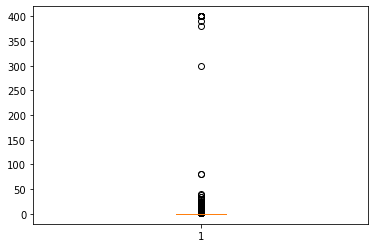

In [16]:
plt.boxplot(new_data['Price'])
print('200 is definetly high price')

### Boxplot for Reviews 

There are definetly some apps high reviews above 4


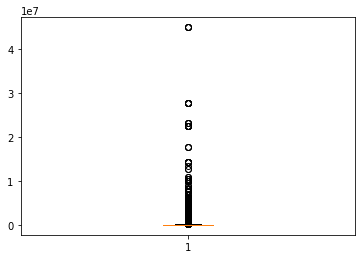

In [17]:
plt.boxplot(new_data['Reviews'])
print('There are definetly some apps high reviews above 4')

### Histogram for Rating

Rating is more skewed on higher side


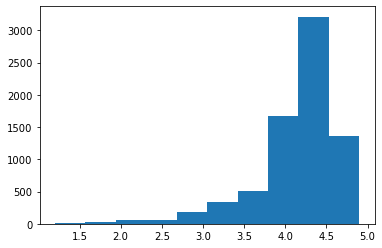

In [18]:
plt.hist(new_data['Rating'])
print("Rating is more skewed on higher side")

### Histogram for Size

(array([3078., 1352.,  954.,  597.,  444.,  321.,  219.,  159.,  116.,
         197.]),
 array([8.00000e+00, 1.00072e+04, 2.00064e+04, 3.00056e+04, 4.00048e+04,
        5.00040e+04, 6.00032e+04, 7.00024e+04, 8.00016e+04, 9.00008e+04,
        1.00000e+05]),
 <BarContainer object of 10 artists>)

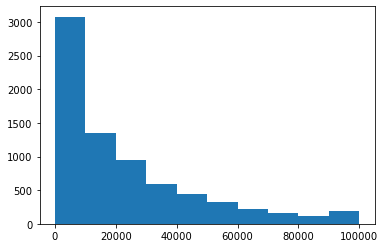

In [19]:
plt.hist(new_data['Size'])

## 6. Outlier treatment:  

In [20]:
new_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10732,Draw with FP sDraw,TOOLS,4.3,3268,467,100000,Free,0.0,Everyone,Tools,"December 16, 2017",6.6,2.0 and up
10755,Hondata Mobile,MAPS_AND_NAVIGATION,4.3,334,676,10000,Free,0.0,Everyone,Maps & Navigation,"August 23, 2016",1.3,2.3.3 and up
10763,FP Разбитый дисплей,FAMILY,4.5,922,552,50000,Free,0.0,Everyone,Entertainment,"September 20, 2014",1.1,1.6 and up
10832,FR Tides,WEATHER,3.8,1195,582,100000,Free,0.0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up


### Price: 

In [21]:
new_data = new_data[new_data['Price']<200]

### Reviews: 

In [22]:
new_data = new_data[(new_data['Reviews'] < 2000000)]

### Installs: 

In [23]:
quartile_10 = np.percentile(new_data['Installs'],10)
quartile_25 = np.percentile(new_data['Installs'],25)
quartile_50 = np.percentile(new_data['Installs'],50)
quartile_70 = np.percentile(new_data['Installs'],70)
quartile_75 = np.percentile(new_data['Installs'],75)
quartile_90 = np.percentile(new_data['Installs'],90)
quartile_95 = np.percentile(new_data['Installs'],95)
quartile_99 = np.percentile(new_data['Installs'],99)

#### Decide a threshold

In [24]:
iqr = quartile_75 - quartile_25
iqr

990000.0

In [25]:
lower_bound_value = quartile_25 -(1.5*iqr)
lower_bound_value

-1475000.0

In [26]:
upper_bound_value = quartile_75 + (1.5*iqr)
upper_bound_value

2485000.0

In [27]:
new_data = new_data[(new_data['Installs'] > lower_bound_value) & (new_data['Installs'] < upper_bound_value)]

In [28]:
new_data.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## 7. Bivariate analysis:

### scatter plot for Rating vs Price 

Rating Incerses with Price


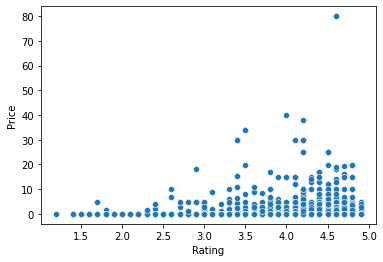

In [29]:
sns.scatterplot(x='Rating',y='Price',data=new_data)
print('Rating Incerses with Price')

### scatter plot for Rating vs. Size

As the size of the app increses we can see the higher amount of Ratings


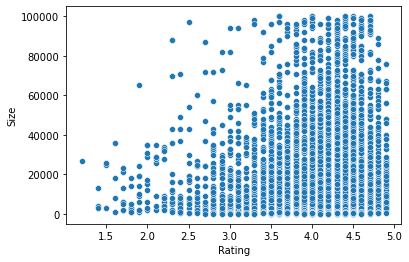

In [30]:
sns.scatterplot(x='Rating',y='Size',data=new_data)
print('As the size of the app increses we can see the higher amount of Ratings')

### scatter plot for Rating vs. Reviews 

Rating and Reviews are directly proportinal to each other


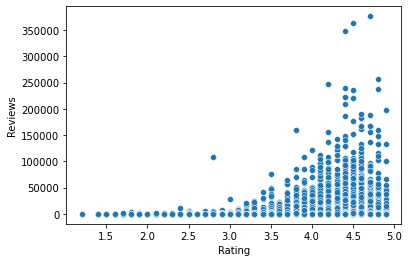

In [31]:
sns.scatterplot(x='Rating',y='Reviews',data=new_data)
print('Rating and Reviews are directly proportinal to each other')

### boxplot for Rating vs. Content Rating 

There are more outliers in the Everyone


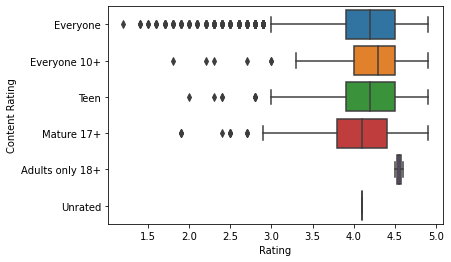

In [32]:
sns.boxplot(x='Rating',y='Content Rating',data=new_data)
print('There are more outliers in the Everyone')

### boxplot for Ratings vs. Category 

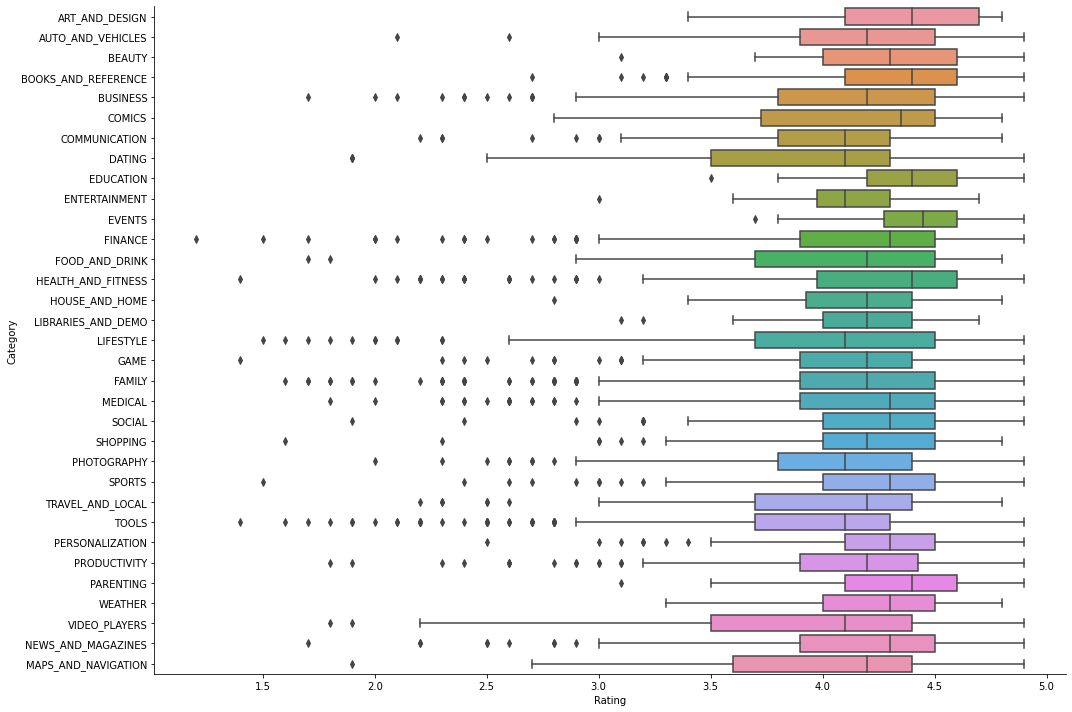

In [33]:
sns.catplot(x='Rating',y='Category',data=new_data,kind='box',aspect=1.5,height=10)
plt.tight_layout()

## 8. Data preprocessing

### Apply np.log to Reviews and Install 

In [34]:
new_data['Reviews'] = new_data['Reviews'].apply(lambda x: np.log(x+1))
new_data['Installs'] = new_data['Installs'].apply(lambda x: np.log(x+1))

In [35]:
new_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000,9.210440,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2000,11.512935,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,5.123964,5000,10.819798,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,5.187386,19000,10.819798,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up


### Drop columns

In [36]:
inp1 = new_data.drop(['App','Last Updated','Current Ver','Android Ver'],axis=1)

In [37]:
inp1 = inp1.reset_index()

### Get dummy columns 

In [38]:
inp1 = pd.get_dummies(inp1,columns=['Category','Content Rating','Genres'],drop_first=True)

In [39]:
inp1 = inp1.drop(['Type'],axis=1)

In [40]:
inp1.head()

,index,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Strategy;Action & Adventure,Genres_Strategy;Creativity,Genres_Strategy;Education,Genres_Tools,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word
0,0,4.1,5.075174,19000,9.210440,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,3.9,6.875232,14000,13.122365,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,4.3,6.875232,2000,11.512935,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,4.4,5.123964,5000,10.819798,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,3.8,5.187386,19000,10.819798,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 9. Train test split

In [59]:
X = inp1.iloc[:,2:].values
X

array([[5.07517382e+00, 1.90000000e+04, 9.21044037e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.87523209e+00, 1.40000000e+04, 1.31223654e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.87523209e+00, 2.00000000e+03, 1.15129355e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [6.82762923e+00, 5.52000000e+02, 1.08197983e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.08673793e+00, 5.82000000e+02, 1.15129355e+01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.80666249e+00, 6.19000000e+02, 6.90875478e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [60]:
y = inp1[['Rating']].values
y

array([[4.1],
       [3.9],
       [4.3],
       ...,
       [4.5],
       [3.8],
       [4.8]])

In [61]:
# Split the Ratio into Training and Test Set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 442)

## 10. Separate the dataframes into X_train, y_train, X_test, and y_test.

In [62]:
X_test

array([[3.68887945e+00, 2.00000000e+03, 8.51739317e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.97673374e+00, 6.00000000e+03, 6.90875478e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.59387784e+00, 2.80000000e+04, 9.21044037e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.56494936e+00, 1.80000000e+04, 6.90875478e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.63478960e+00, 1.00000000e+03, 9.21044037e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.93182563e+00, 4.00000000e+03, 6.90875478e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [63]:
X_train

array([[1.03853580e+01, 1.00000000e+04, 1.38155116e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.25749537e+00, 5.00000000e+03, 1.08197983e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.99043259e+00, 6.00000000e+03, 9.21044037e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.63758616e+00, 1.00000000e+04, 6.90875478e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.13549422e+00, 1.80000000e+04, 9.21044037e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.45362500e+00, 1.00000000e+03, 1.15129355e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [64]:
y_test

array([[3.7],
       [4.6],
       [4.5],
       ...,
       [4.8],
       [4.2],
       [3.1]])

In [65]:
y_train

array([[4.6],
       [3.5],
       [4.3],
       ...,
       [4.7],
       [4.3],
       [4.4]])

## 11 . Model building 

In [66]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [67]:
y_pred = regressor.predict(X_test)

### Checking the Predicted value and Actual Value 

In [68]:
y_pred

array([[4.07203891],
       [4.23971539],
       [4.53183974],
       ...,
       [3.97337885],
       [4.31902391],
       [4.39130751]])

In [69]:
y_test

array([[3.7],
       [4.6],
       [4.5],
       ...,
       [4.8],
       [4.2],
       [3.1]])

### Scatter Plot 

Text(0, 0.5, 'Predicted Y')

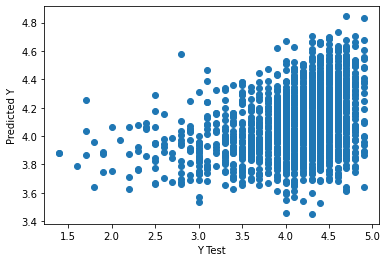

In [70]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## 12. Make predictions on test set 

In [71]:
y_pred = regressor.predict(X_test)
np.set_printoptions()
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[4.07203891 3.7       ]
 [4.23971539 4.6       ]
 [4.53183974 4.5       ]
 ...
 [3.97337885 4.8       ]
 [4.31902391 4.2       ]
 [4.39130751 3.1       ]]
